# Bayesian Search

# All Libraries (Must execute)

In [1]:
# Numpy, pandas, matplotlib, statistics, os, bayes_opt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import os
import time
from bayes_opt import BayesianOptimization


# Sklearn

from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV


# Tensorflow & keras


import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import initializers
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, InputLayer, ReLU, PReLU, LeakyReLU, Softmax
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from kerastuner.tuners import RandomSearch
from kerastuner.tuners import BayesianOptimization
from kerastuner.tuners import Hyperband

<ipython-input-1-551cc858abc6>:43: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


# Dataset (Must execute)

In [2]:
df = pd.read_csv('D:\\Drive 1\\MS\\Masters\\Additive Manufacturing\\AI in AM\\1\\Data 3.csv', header = 0)
df.head()

,Sr. #,Power,Speed,Thickness,Spacing,Density
0,1,25.0,700.0,0.02,0.08,76.02
1,2,25.0,700.0,0.02,0.04,91.22
2,3,100.0,1700.0,0.02,0.06,98.12
3,4,80.0,1500.0,0.02,0.04,98.33
4,5,80.0,700.0,0.02,0.08,99.02


In [3]:
df.isnull().any()

Sr. #        False
Power        False
Speed        False
Thickness    False
Spacing      False
Density      False
dtype: bool

In [4]:
# Conversion into numpy array for further processing
X = df.iloc[:,1:5]
X = pd.DataFrame(X)
Y = df.iloc[:,5]
X_num = X.values
Y_num = Y.values

# Train-test split (Must execute)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size = 0.3, random_state = 50)
print(X_train.shape)
print(X_test.shape)

(58, 4)
(26, 4)


# Feature Scaling (Must execute)

(i) Standardization &
(ii) Normalization

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaling = StandardScaler ()

In [7]:
X_train_scaled = scaling.fit_transform(X_train)
X_test_scaled = scaling.fit_transform(X_test)
X_scaled = scaling.fit_transform(X)

In [8]:
min_max=MinMaxScaler()
X_train_normalized=pd.DataFrame(min_max.fit_transform(X_train))
X_test_normalized=pd.DataFrame(min_max.fit_transform(X_test))
X_train_normalized.head()

,0,1,2,3
0,0.429272,0.311805,0.000000,0.20
1,0.306623,0.067761,1.000000,0.80
2,0.306623,0.004764,1.000000,0.71
3,0.511038,0.177343,0.333333,1.00
4,0.511038,0.258867,0.666667,0.40


In [9]:
X_test_normalized.head()

,0,1,2,3
0,0.272727,0.000000,1.000000,0.800
1,0.545455,0.468461,0.333333,0.800
2,0.889455,0.597645,0.000000,0.678
3,0.565091,0.597645,0.000000,0.678
4,0.636364,0.537426,1.000000,0.700


# Hyperparameter Optimization 2
Bayesian search using Keras Tuner

In [10]:
def build_model_2(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 1, 10)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.SGD(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [11]:
tuner_2 = BayesianOptimization(
    build_model_2,
    objective='val_mean_absolute_error',
    max_trials = 1,
    overwrite=True
)

In [12]:
tuner_2.search(X_train_scaled, Y_train,
             epochs=5000,
             validation_data=(X_test_scaled, Y_test))

Trial 1 Complete [00h 04m 36s]
val_mean_absolute_error: 1.1830635070800781

Best val_mean_absolute_error So Far: 1.1830635070800781
Total elapsed time: 00h 04m 36s
INFO:tensorflow:Oracle triggered exit


In [13]:
tuner_2.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 2
units_0: 416
learning_rate: 0.001
units_1: 32
Score: 1.1830635070800781


# Model Implementation in Keras

In [14]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))
opt = SGD(learning_rate = 0.001, clipnorm=1.0)    
model = Sequential ()
model.add(InputLayer(X_train.shape[1]))
model.add(Dense(416,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
model.add(Dense(32,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
model.add(Dense(1))
model.compile(loss = root_mean_squared_error, optimizer = opt)
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 416)               2080      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                13344     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 15,457
Trainable params: 15,457
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
history = model.fit(X_train_scaled, Y_train, verbose = 1, epochs=4000, batch_size = 32, validation_data = (X_test_scaled,Y_test))

Epoch 1/4000
2/2 [==============================] - 0s 88ms/step - loss: 97.2588 - val_loss: 97.2437
Epoch 2/4000
2/2 [==============================] - 0s 13ms/step - loss: 97.2537 - val_loss: 97.2366
Epoch 3/4000
2/2 [==============================] - 0s 14ms/step - loss: 97.2444 - val_loss: 97.2294
Epoch 4/4000
2/2 [==============================] - 0s 14ms/step - loss: 97.2388 - val_loss: 97.2221
Epoch 5/4000
2/2 [==============================] - 0s 12ms/step - loss: 97.2280 - val_loss: 97.2149
Epoch 6/4000
2/2 [==============================] - 0s 11ms/step - loss: 97.2236 - val_loss: 97.2076
Epoch 7/4000
2/2 [==============================] - 0s 13ms/step - loss: 97.2163 - val_loss: 97.2003
Epoch 8/4000
2/2 [==============================] - 0s 14ms/step - loss: 97.2075 - val_loss: 97.1931
Epoch 9/4000
2/2 [==============================] - 0s 13ms/step - loss: 97.2014 - val_loss: 97.1858
Epoch 10/4000
2/2 [==============================] - 0s 15ms/step - loss: 97.1923 - val_los

Epoch 161/4000
2/2 [==============================] - 0s 10ms/step - loss: 95.7769 - val_loss: 95.7859
Epoch 162/4000
2/2 [==============================] - 0s 28ms/step - loss: 95.7674 - val_loss: 95.7738
Epoch 163/4000
2/2 [==============================] - 0s 21ms/step - loss: 95.7545 - val_loss: 95.7617
Epoch 164/4000
2/2 [==============================] - 0s 13ms/step - loss: 95.7428 - val_loss: 95.7494
Epoch 165/4000
2/2 [==============================] - 0s 14ms/step - loss: 95.7301 - val_loss: 95.7372
Epoch 166/4000
2/2 [==============================] - 0s 17ms/step - loss: 95.7171 - val_loss: 95.7249
Epoch 167/4000
2/2 [==============================] - 0s 11ms/step - loss: 95.7042 - val_loss: 95.7126
Epoch 168/4000
2/2 [==============================] - 0s 11ms/step - loss: 95.6928 - val_loss: 95.7004
Epoch 169/4000
2/2 [==============================] - 0s 12ms/step - loss: 95.6807 - val_loss: 95.6880
Epoch 170/4000
2/2 [==============================] - 0s 12ms/step - loss

2/2 [==============================] - 0s 12ms/step - loss: 93.3675 - val_loss: 93.4010
Epoch 320/4000
2/2 [==============================] - 0s 12ms/step - loss: 93.3506 - val_loss: 93.3827
Epoch 321/4000
2/2 [==============================] - 0s 10ms/step - loss: 93.3318 - val_loss: 93.3648
Epoch 322/4000
2/2 [==============================] - 0s 10ms/step - loss: 93.3126 - val_loss: 93.3466
Epoch 323/4000
2/2 [==============================] - 0s 11ms/step - loss: 93.2953 - val_loss: 93.3281
Epoch 324/4000
2/2 [==============================] - 0s 10ms/step - loss: 93.2760 - val_loss: 93.3096
Epoch 325/4000
2/2 [==============================] - 0s 10ms/step - loss: 93.2576 - val_loss: 93.2912
Epoch 326/4000
2/2 [==============================] - 0s 10ms/step - loss: 93.2361 - val_loss: 93.2727
Epoch 327/4000
2/2 [==============================] - 0s 10ms/step - loss: 93.2203 - val_loss: 93.2541
Epoch 328/4000
2/2 [==============================] - 0s 9ms/step - loss: 93.1992 - val_

2/2 [==============================] - 0s 10ms/step - loss: 89.8876 - val_loss: 89.9656
Epoch 478/4000
2/2 [==============================] - 0s 9ms/step - loss: 89.8599 - val_loss: 89.9403
Epoch 479/4000
2/2 [==============================] - 0s 8ms/step - loss: 89.8372 - val_loss: 89.9146
Epoch 480/4000
2/2 [==============================] - 0s 10ms/step - loss: 89.8111 - val_loss: 89.8889
Epoch 481/4000
2/2 [==============================] - 0s 10ms/step - loss: 89.7849 - val_loss: 89.8631
Epoch 482/4000
2/2 [==============================] - 0s 11ms/step - loss: 89.7591 - val_loss: 89.8374
Epoch 483/4000
2/2 [==============================] - 0s 18ms/step - loss: 89.7300 - val_loss: 89.8115
Epoch 484/4000
2/2 [==============================] - 0s 19ms/step - loss: 89.7063 - val_loss: 89.7856
Epoch 485/4000
2/2 [==============================] - 0s 19ms/step - loss: 89.6770 - val_loss: 89.7596
Epoch 486/4000
2/2 [==============================] - 0s 10ms/step - loss: 89.6509 - val_l

Epoch 557/4000
2/2 [==============================] - 0s 9ms/step - loss: 87.6477 - val_loss: 87.7582
Epoch 558/4000
2/2 [==============================] - 0s 9ms/step - loss: 87.6157 - val_loss: 87.7282
Epoch 559/4000
2/2 [==============================] - 0s 10ms/step - loss: 87.5874 - val_loss: 87.6985
Epoch 560/4000
2/2 [==============================] - 0s 10ms/step - loss: 87.5574 - val_loss: 87.6687
Epoch 561/4000
2/2 [==============================] - 0s 9ms/step - loss: 87.5255 - val_loss: 87.6388
Epoch 562/4000
2/2 [==============================] - 0s 9ms/step - loss: 87.4968 - val_loss: 87.6086
Epoch 563/4000
2/2 [==============================] - 0s 10ms/step - loss: 87.4662 - val_loss: 87.5784
Epoch 564/4000
2/2 [==============================] - 0s 9ms/step - loss: 87.4352 - val_loss: 87.5482
Epoch 565/4000
2/2 [==============================] - 0s 10ms/step - loss: 87.4049 - val_loss: 87.5180
Epoch 566/4000
2/2 [==============================] - 0s 9ms/step - loss: 87.3

Epoch 716/4000
2/2 [==============================] - 0s 11ms/step - loss: 82.1037 - val_loss: 82.2954
Epoch 717/4000
2/2 [==============================] - 0s 11ms/step - loss: 82.0603 - val_loss: 82.2559
Epoch 718/4000
2/2 [==============================] - 0s 10ms/step - loss: 82.0230 - val_loss: 82.2170
Epoch 719/4000
2/2 [==============================] - 0s 10ms/step - loss: 81.9821 - val_loss: 82.1778
Epoch 720/4000
2/2 [==============================] - 0s 11ms/step - loss: 81.9425 - val_loss: 82.1382
Epoch 721/4000
2/2 [==============================] - 0s 11ms/step - loss: 81.8980 - val_loss: 82.0988
Epoch 722/4000
2/2 [==============================] - 0s 9ms/step - loss: 81.8633 - val_loss: 82.0595
Epoch 723/4000
2/2 [==============================] - 0s 9ms/step - loss: 81.8229 - val_loss: 82.0197
Epoch 724/4000
2/2 [==============================] - 0s 11ms/step - loss: 81.7820 - val_loss: 81.9797
Epoch 725/4000
2/2 [==============================] - 0s 18ms/step - loss: 

2/2 [==============================] - 0s 9ms/step - loss: 74.9572 - val_loss: 75.2808
Epoch 875/4000
2/2 [==============================] - 0s 9ms/step - loss: 74.9131 - val_loss: 75.2307
Epoch 876/4000
2/2 [==============================] - 0s 10ms/step - loss: 74.8630 - val_loss: 75.1807
Epoch 877/4000
2/2 [==============================] - 0s 10ms/step - loss: 74.8117 - val_loss: 75.1305
Epoch 878/4000
2/2 [==============================] - 0s 10ms/step - loss: 74.7544 - val_loss: 75.0809
Epoch 879/4000
2/2 [==============================] - 0s 10ms/step - loss: 74.7116 - val_loss: 75.0304
Epoch 880/4000
2/2 [==============================] - 0s 9ms/step - loss: 74.6627 - val_loss: 74.9800
Epoch 881/4000
2/2 [==============================] - 0s 10ms/step - loss: 74.6115 - val_loss: 74.9300
Epoch 882/4000
2/2 [==============================] - 0s 11ms/step - loss: 74.5511 - val_loss: 74.8795
Epoch 883/4000
2/2 [==============================] - 0s 12ms/step - loss: 74.4988 - val_lo

2/2 [==============================] - 0s 10ms/step - loss: 70.7019 - val_loss: 71.1201
Epoch 954/4000
2/2 [==============================] - 0s 11ms/step - loss: 70.6793 - val_loss: 71.0642
Epoch 955/4000
2/2 [==============================] - 0s 10ms/step - loss: 70.6226 - val_loss: 71.0084
Epoch 956/4000
2/2 [==============================] - 0s 13ms/step - loss: 70.5670 - val_loss: 70.9530
Epoch 957/4000
2/2 [==============================] - 0s 11ms/step - loss: 70.5076 - val_loss: 70.8971
Epoch 958/4000
2/2 [==============================] - 0s 12ms/step - loss: 70.4507 - val_loss: 70.8411
Epoch 959/4000
2/2 [==============================] - 0s 10ms/step - loss: 70.3900 - val_loss: 70.7846
Epoch 960/4000
2/2 [==============================] - 0s 10ms/step - loss: 70.3358 - val_loss: 70.7281
Epoch 961/4000
2/2 [==============================] - 0s 11ms/step - loss: 70.2783 - val_loss: 70.6717
Epoch 962/4000
2/2 [==============================] - 0s 11ms/step - loss: 70.2228 - val

2/2 [==============================] - 0s 9ms/step - loss: 60.8249 - val_loss: 61.3753
Epoch 1112/4000
2/2 [==============================] - 0s 9ms/step - loss: 60.7548 - val_loss: 61.3073
Epoch 1113/4000
2/2 [==============================] - 0s 9ms/step - loss: 60.6869 - val_loss: 61.2390
Epoch 1114/4000
2/2 [==============================] - 0s 9ms/step - loss: 60.5741 - val_loss: 61.1710
Epoch 1115/4000
2/2 [==============================] - 0s 9ms/step - loss: 60.5466 - val_loss: 61.1033
Epoch 1116/4000
2/2 [==============================] - 0s 10ms/step - loss: 60.4789 - val_loss: 61.0350
Epoch 1117/4000
2/2 [==============================] - 0s 9ms/step - loss: 60.3991 - val_loss: 60.9677
Epoch 1118/4000
2/2 [==============================] - 0s 9ms/step - loss: 60.3407 - val_loss: 60.8992
Epoch 1119/4000
2/2 [==============================] - 0s 9ms/step - loss: 60.2712 - val_loss: 60.8309
Epoch 1120/4000
2/2 [==============================] - 0s 9ms/step - loss: 60.1996 - val

2/2 [==============================] - 0s 9ms/step - loss: 48.9339 - val_loss: 49.7041
Epoch 1270/4000
2/2 [==============================] - 0s 10ms/step - loss: 48.8603 - val_loss: 49.6239
Epoch 1271/4000
2/2 [==============================] - 0s 10ms/step - loss: 48.7533 - val_loss: 49.5440
Epoch 1272/4000
2/2 [==============================] - 0s 9ms/step - loss: 48.6934 - val_loss: 49.4641
Epoch 1273/4000
2/2 [==============================] - 0s 10ms/step - loss: 48.6127 - val_loss: 49.3842
Epoch 1274/4000
2/2 [==============================] - 0s 10ms/step - loss: 48.5120 - val_loss: 49.3033
Epoch 1275/4000
2/2 [==============================] - 0s 13ms/step - loss: 48.4499 - val_loss: 49.2231
Epoch 1276/4000
2/2 [==============================] - 0s 10ms/step - loss: 48.3461 - val_loss: 49.1421
Epoch 1277/4000
2/2 [==============================] - 0s 9ms/step - loss: 48.2755 - val_loss: 49.0610
Epoch 1278/4000
2/2 [==============================] - ETA: 0s - loss: 49.85 - 0s 1

2/2 [==============================] - 0s 9ms/step - loss: 35.3363 - val_loss: 36.3719
Epoch 1427/4000
2/2 [==============================] - 0s 10ms/step - loss: 35.2453 - val_loss: 36.2830
Epoch 1428/4000
2/2 [==============================] - 0s 10ms/step - loss: 34.9797 - val_loss: 36.1947
Epoch 1429/4000
2/2 [==============================] - 0s 8ms/step - loss: 35.0466 - val_loss: 36.1052
Epoch 1430/4000
2/2 [==============================] - 0s 10ms/step - loss: 34.9474 - val_loss: 36.0158
Epoch 1431/4000
2/2 [==============================] - 0s 9ms/step - loss: 34.8462 - val_loss: 35.9267
Epoch 1432/4000
2/2 [==============================] - 0s 10ms/step - loss: 34.7831 - val_loss: 35.8378
Epoch 1433/4000
2/2 [==============================] - 0s 10ms/step - loss: 34.6970 - val_loss: 35.7492
Epoch 1434/4000
2/2 [==============================] - 0s 10ms/step - loss: 34.5571 - val_loss: 35.6605
Epoch 1435/4000
2/2 [==============================] - 0s 10ms/step - loss: 34.5107

2/2 [==============================] - 0s 10ms/step - loss: 21.3107 - val_loss: 22.7110
Epoch 1585/4000
2/2 [==============================] - 0s 10ms/step - loss: 21.2141 - val_loss: 22.6334
Epoch 1586/4000
2/2 [==============================] - 0s 9ms/step - loss: 21.0394 - val_loss: 22.5563
Epoch 1587/4000
2/2 [==============================] - 0s 14ms/step - loss: 20.9456 - val_loss: 22.4796
Epoch 1588/4000
2/2 [==============================] - 0s 10ms/step - loss: 20.9918 - val_loss: 22.4032
Epoch 1589/4000
2/2 [==============================] - 0s 9ms/step - loss: 20.9094 - val_loss: 22.3278
Epoch 1590/4000
2/2 [==============================] - 0s 10ms/step - loss: 20.8035 - val_loss: 22.2523
Epoch 1591/4000
2/2 [==============================] - 0s 8ms/step - loss: 20.7447 - val_loss: 22.1769
Epoch 1592/4000
2/2 [==============================] - 0s 9ms/step - loss: 20.6392 - val_loss: 22.1014
Epoch 1593/4000
2/2 [==============================] - 0s 9ms/step - loss: 20.5874 -

2/2 [==============================] - 0s 12ms/step - loss: 13.5183 - val_loss: 15.1250
Epoch 1743/4000
2/2 [==============================] - 0s 15ms/step - loss: 13.5147 - val_loss: 15.1062
Epoch 1744/4000
2/2 [==============================] - 0s 13ms/step - loss: 13.4903 - val_loss: 15.0832
Epoch 1745/4000
2/2 [==============================] - 0s 13ms/step - loss: 13.4666 - val_loss: 15.0579
Epoch 1746/4000
2/2 [==============================] - 0s 12ms/step - loss: 13.4537 - val_loss: 15.0389
Epoch 1747/4000
2/2 [==============================] - 0s 10ms/step - loss: 13.4238 - val_loss: 15.0174
Epoch 1748/4000
2/2 [==============================] - 0s 10ms/step - loss: 13.3967 - val_loss: 14.9950
Epoch 1749/4000
2/2 [==============================] - 0s 10ms/step - loss: 13.3417 - val_loss: 14.9720
Epoch 1750/4000
2/2 [==============================] - 0s 13ms/step - loss: 13.3558 - val_loss: 14.9484
Epoch 1751/4000
2/2 [==============================] - 0s 11ms/step - loss: 13.3

2/2 [==============================] - 0s 10ms/step - loss: 11.9439 - val_loss: 13.6614
Epoch 1822/4000
2/2 [==============================] - 0s 9ms/step - loss: 11.9102 - val_loss: 13.6447
Epoch 1823/4000
2/2 [==============================] - 0s 9ms/step - loss: 11.8851 - val_loss: 13.6293
Epoch 1824/4000
2/2 [==============================] - 0s 9ms/step - loss: 11.8957 - val_loss: 13.6109
Epoch 1825/4000
2/2 [==============================] - 0s 9ms/step - loss: 11.8407 - val_loss: 13.5928
Epoch 1826/4000
2/2 [==============================] - 0s 9ms/step - loss: 11.7625 - val_loss: 13.5760
Epoch 1827/4000
2/2 [==============================] - 0s 9ms/step - loss: 11.8305 - val_loss: 13.5586
Epoch 1828/4000
2/2 [==============================] - 0s 9ms/step - loss: 11.7626 - val_loss: 13.5410
Epoch 1829/4000
2/2 [==============================] - 0s 10ms/step - loss: 11.7833 - val_loss: 13.5249
Epoch 1830/4000
2/2 [==============================] - 0s 9ms/step - loss: 11.7655 - va

2/2 [==============================] - 0s 11ms/step - loss: 9.1534 - val_loss: 11.0688
Epoch 1980/4000
2/2 [==============================] - 0s 11ms/step - loss: 9.1647 - val_loss: 11.0535
Epoch 1981/4000
2/2 [==============================] - 0s 14ms/step - loss: 9.1507 - val_loss: 11.0371
Epoch 1982/4000
2/2 [==============================] - 0s 10ms/step - loss: 9.1354 - val_loss: 11.0215
Epoch 1983/4000
2/2 [==============================] - 0s 9ms/step - loss: 9.1165 - val_loss: 11.0060
Epoch 1984/4000
2/2 [==============================] - 0s 10ms/step - loss: 9.0982 - val_loss: 10.9957
Epoch 1985/4000
2/2 [==============================] - 0s 9ms/step - loss: 9.0894 - val_loss: 10.9795
Epoch 1986/4000
2/2 [==============================] - 0s 12ms/step - loss: 9.0693 - val_loss: 10.9708
Epoch 1987/4000
2/2 [==============================] - 0s 10ms/step - loss: 9.0236 - val_loss: 10.9558
Epoch 1988/4000
2/2 [==============================] - 0s 10ms/step - loss: 9.0448 - val_lo

Epoch 2059/4000
2/2 [==============================] - 0s 9ms/step - loss: 8.0420 - val_loss: 9.9728
Epoch 2060/4000
2/2 [==============================] - 0s 9ms/step - loss: 8.0548 - val_loss: 9.9562
Epoch 2061/4000
2/2 [==============================] - 0s 10ms/step - loss: 8.0276 - val_loss: 9.9395
Epoch 2062/4000
2/2 [==============================] - 0s 10ms/step - loss: 8.0090 - val_loss: 9.9253
Epoch 2063/4000
2/2 [==============================] - 0s 9ms/step - loss: 8.0020 - val_loss: 9.9164
Epoch 2064/4000
2/2 [==============================] - 0s 10ms/step - loss: 8.0028 - val_loss: 9.9014
Epoch 2065/4000
2/2 [==============================] - 0s 9ms/step - loss: 7.9433 - val_loss: 9.8888
Epoch 2066/4000
2/2 [==============================] - 0s 10ms/step - loss: 7.9734 - val_loss: 9.8734
Epoch 2067/4000
2/2 [==============================] - 0s 10ms/step - loss: 7.9678 - val_loss: 9.8639
Epoch 2068/4000
2/2 [==============================] - 0s 9ms/step - loss: 7.8494 - va

Epoch 2219/4000
2/2 [==============================] - 0s 10ms/step - loss: 6.3259 - val_loss: 8.0393
Epoch 2220/4000
2/2 [==============================] - 0s 10ms/step - loss: 6.2826 - val_loss: 8.0307
Epoch 2221/4000
2/2 [==============================] - 0s 15ms/step - loss: 6.3051 - val_loss: 8.0161
Epoch 2222/4000
2/2 [==============================] - 0s 15ms/step - loss: 6.2464 - val_loss: 8.0040
Epoch 2223/4000
2/2 [==============================] - 0s 14ms/step - loss: 6.1937 - val_loss: 7.9930
Epoch 2224/4000
2/2 [==============================] - ETA: 0s - loss: 6.787 - 0s 11ms/step - loss: 6.2479 - val_loss: 7.9823
Epoch 2225/4000
2/2 [==============================] - 0s 12ms/step - loss: 6.2670 - val_loss: 7.9728
Epoch 2226/4000
2/2 [==============================] - 0s 10ms/step - loss: 6.2532 - val_loss: 7.9587
Epoch 2227/4000
2/2 [==============================] - 0s 10ms/step - loss: 6.0733 - val_loss: 7.9458
Epoch 2228/4000
2/2 [==============================] - 0s 

2/2 [==============================] - 0s 10ms/step - loss: 5.0673 - val_loss: 6.5035
Epoch 2380/4000
2/2 [==============================] - 0s 9ms/step - loss: 5.0630 - val_loss: 6.4959
Epoch 2381/4000
2/2 [==============================] - 0s 10ms/step - loss: 5.0575 - val_loss: 6.4885
Epoch 2382/4000
2/2 [==============================] - 0s 9ms/step - loss: 5.0162 - val_loss: 6.4822
Epoch 2383/4000
2/2 [==============================] - 0s 12ms/step - loss: 4.9572 - val_loss: 6.4756
Epoch 2384/4000
2/2 [==============================] - 0s 10ms/step - loss: 5.0288 - val_loss: 6.4619
Epoch 2385/4000
2/2 [==============================] - 0s 10ms/step - loss: 5.0043 - val_loss: 6.4536
Epoch 2386/4000
2/2 [==============================] - 0s 10ms/step - loss: 4.9972 - val_loss: 6.4444
Epoch 2387/4000
2/2 [==============================] - 0s 10ms/step - loss: 4.9885 - val_loss: 6.4385
Epoch 2388/4000
2/2 [==============================] - 0s 11ms/step - loss: 5.0116 - val_loss: 6.430

2/2 [==============================] - 0s 10ms/step - loss: 4.2633 - val_loss: 5.3830
Epoch 2540/4000
2/2 [==============================] - 0s 10ms/step - loss: 4.2260 - val_loss: 5.3761
Epoch 2541/4000
2/2 [==============================] - 0s 10ms/step - loss: 4.2373 - val_loss: 5.3686
Epoch 2542/4000
2/2 [==============================] - 0s 10ms/step - loss: 4.2172 - val_loss: 5.3572
Epoch 2543/4000
2/2 [==============================] - 0s 9ms/step - loss: 4.2146 - val_loss: 5.3553
Epoch 2544/4000
2/2 [==============================] - 0s 11ms/step - loss: 4.2101 - val_loss: 5.3494
Epoch 2545/4000
2/2 [==============================] - 0s 11ms/step - loss: 4.1379 - val_loss: 5.3429
Epoch 2546/4000
2/2 [==============================] - 0s 10ms/step - loss: 4.1901 - val_loss: 5.3357
Epoch 2547/4000
2/2 [==============================] - 0s 10ms/step - loss: 4.2399 - val_loss: 5.3305
Epoch 2548/4000
2/2 [==============================] - 0s 10ms/step - loss: 4.1732 - val_loss: 5.32

2/2 [==============================] - 0s 10ms/step - loss: 3.7575 - val_loss: 4.5921
Epoch 2700/4000
2/2 [==============================] - 0s 9ms/step - loss: 3.7244 - val_loss: 4.5913
Epoch 2701/4000
2/2 [==============================] - 0s 10ms/step - loss: 3.7103 - val_loss: 4.5887
Epoch 2702/4000
2/2 [==============================] - 0s 10ms/step - loss: 3.7004 - val_loss: 4.5826
Epoch 2703/4000
2/2 [==============================] - 0s 10ms/step - loss: 3.7093 - val_loss: 4.5773
Epoch 2704/4000
2/2 [==============================] - 0s 9ms/step - loss: 3.7010 - val_loss: 4.5755
Epoch 2705/4000
2/2 [==============================] - 0s 8ms/step - loss: 3.7060 - val_loss: 4.5699
Epoch 2706/4000
2/2 [==============================] - 0s 11ms/step - loss: 3.7236 - val_loss: 4.5672
Epoch 2707/4000
2/2 [==============================] - 0s 10ms/step - loss: 3.6839 - val_loss: 4.5637
Epoch 2708/4000
2/2 [==============================] - 0s 9ms/step - loss: 3.6634 - val_loss: 4.5617


2/2 [==============================] - 0s 10ms/step - loss: 3.3297 - val_loss: 4.0695
Epoch 2860/4000
2/2 [==============================] - 0s 9ms/step - loss: 3.4024 - val_loss: 4.0671
Epoch 2861/4000
2/2 [==============================] - 0s 9ms/step - loss: 3.3235 - val_loss: 4.0652
Epoch 2862/4000
2/2 [==============================] - 0s 10ms/step - loss: 3.2907 - val_loss: 4.0621
Epoch 2863/4000
2/2 [==============================] - 0s 10ms/step - loss: 3.3947 - val_loss: 4.0612
Epoch 2864/4000
2/2 [==============================] - 0s 11ms/step - loss: 3.2956 - val_loss: 4.0569
Epoch 2865/4000
2/2 [==============================] - 0s 10ms/step - loss: 3.4007 - val_loss: 4.0556
Epoch 2866/4000
2/2 [==============================] - 0s 10ms/step - loss: 3.3646 - val_loss: 4.0496
Epoch 2867/4000
2/2 [==============================] - 0s 9ms/step - loss: 3.3847 - val_loss: 4.0466
Epoch 2868/4000
2/2 [==============================] - 0s 9ms/step - loss: 3.3635 - val_loss: 4.0439


Epoch 2940/4000
2/2 [==============================] - 0s 10ms/step - loss: 3.2187 - val_loss: 3.8682
Epoch 2941/4000
2/2 [==============================] - 0s 9ms/step - loss: 3.1582 - val_loss: 3.8663
Epoch 2942/4000
2/2 [==============================] - 0s 9ms/step - loss: 3.2570 - val_loss: 3.8659
Epoch 2943/4000
2/2 [==============================] - 0s 9ms/step - loss: 3.2432 - val_loss: 3.8626
Epoch 2944/4000
2/2 [==============================] - 0s 10ms/step - loss: 3.2478 - val_loss: 3.8612
Epoch 2945/4000
2/2 [==============================] - 0s 10ms/step - loss: 3.2093 - val_loss: 3.8586
Epoch 2946/4000
2/2 [==============================] - 0s 9ms/step - loss: 3.2770 - val_loss: 3.8554
Epoch 2947/4000
2/2 [==============================] - 0s 9ms/step - loss: 3.2519 - val_loss: 3.8545
Epoch 2948/4000
2/2 [==============================] - 0s 10ms/step - loss: 3.2468 - val_loss: 3.8531
Epoch 2949/4000
2/2 [==============================] - 0s 11ms/step - loss: 3.1808 - va

Epoch 3101/4000
2/2 [==============================] - 0s 9ms/step - loss: 3.0700 - val_loss: 3.5470
Epoch 3102/4000
2/2 [==============================] - 0s 13ms/step - loss: 3.0482 - val_loss: 3.5462
Epoch 3103/4000
2/2 [==============================] - 0s 12ms/step - loss: 3.0835 - val_loss: 3.5453
Epoch 3104/4000
2/2 [==============================] - 0s 14ms/step - loss: 2.9693 - val_loss: 3.5427
Epoch 3105/4000
2/2 [==============================] - 0s 14ms/step - loss: 2.9745 - val_loss: 3.5404
Epoch 3106/4000
2/2 [==============================] - 0s 10ms/step - loss: 2.9660 - val_loss: 3.5397
Epoch 3107/4000
2/2 [==============================] - 0s 9ms/step - loss: 2.9468 - val_loss: 3.5382
Epoch 3108/4000
2/2 [==============================] - 0s 10ms/step - loss: 3.0334 - val_loss: 3.5370
Epoch 3109/4000
2/2 [==============================] - 0s 10ms/step - loss: 3.0225 - val_loss: 3.5361
Epoch 3110/4000
2/2 [==============================] - 0s 9ms/step - loss: 3.0225 - 

2/2 [==============================] - 0s 27ms/step - loss: 2.9078 - val_loss: 3.3182
Epoch 3262/4000
2/2 [==============================] - 0s 11ms/step - loss: 2.8906 - val_loss: 3.3161
Epoch 3263/4000
2/2 [==============================] - 0s 10ms/step - loss: 2.8639 - val_loss: 3.3155
Epoch 3264/4000
2/2 [==============================] - 0s 9ms/step - loss: 2.8631 - val_loss: 3.3147
Epoch 3265/4000
2/2 [==============================] - 0s 9ms/step - loss: 2.9001 - val_loss: 3.3127
Epoch 3266/4000
2/2 [==============================] - 0s 10ms/step - loss: 2.9090 - val_loss: 3.3104
Epoch 3267/4000
2/2 [==============================] - 0s 10ms/step - loss: 2.8888 - val_loss: 3.3094
Epoch 3268/4000
2/2 [==============================] - 0s 10ms/step - loss: 2.9030 - val_loss: 3.3085
Epoch 3269/4000
2/2 [==============================] - 0s 10ms/step - loss: 2.9231 - val_loss: 3.3081
Epoch 3270/4000
2/2 [==============================] - 0s 9ms/step - loss: 2.8813 - val_loss: 3.3075

Epoch 3422/4000
2/2 [==============================] - 0s 9ms/step - loss: 2.7556 - val_loss: 3.1445
Epoch 3423/4000
2/2 [==============================] - 0s 9ms/step - loss: 2.7502 - val_loss: 3.1443
Epoch 3424/4000
2/2 [==============================] - 0s 9ms/step - loss: 2.7719 - val_loss: 3.1412
Epoch 3425/4000
2/2 [==============================] - 0s 10ms/step - loss: 2.7901 - val_loss: 3.1407
Epoch 3426/4000
2/2 [==============================] - 0s 12ms/step - loss: 2.7523 - val_loss: 3.1398
Epoch 3427/4000
2/2 [==============================] - 0s 10ms/step - loss: 2.6910 - val_loss: 3.1371
Epoch 3428/4000
2/2 [==============================] - 0s 10ms/step - loss: 2.7157 - val_loss: 3.1364
Epoch 3429/4000
2/2 [==============================] - 0s 10ms/step - loss: 2.7502 - val_loss: 3.1350
Epoch 3430/4000
2/2 [==============================] - 0s 27ms/step - loss: 2.7181 - val_loss: 3.1343
Epoch 3431/4000
2/2 [==============================] - 0s 18ms/step - loss: 2.7271 - 

2/2 [==============================] - 0s 11ms/step - loss: 2.6818 - val_loss: 3.0088
Epoch 3583/4000
2/2 [==============================] - 0s 10ms/step - loss: 2.6107 - val_loss: 3.0082
Epoch 3584/4000
2/2 [==============================] - 0s 10ms/step - loss: 2.6726 - val_loss: 3.0080
Epoch 3585/4000
2/2 [==============================] - 0s 10ms/step - loss: 2.6970 - val_loss: 3.0080
Epoch 3586/4000
2/2 [==============================] - 0s 9ms/step - loss: 2.6521 - val_loss: 3.0075
Epoch 3587/4000
2/2 [==============================] - 0s 10ms/step - loss: 2.6852 - val_loss: 3.0072
Epoch 3588/4000
2/2 [==============================] - 0s 10ms/step - loss: 2.6778 - val_loss: 3.0063
Epoch 3589/4000
2/2 [==============================] - 0s 11ms/step - loss: 2.7236 - val_loss: 3.0046
Epoch 3590/4000
2/2 [==============================] - 0s 10ms/step - loss: 2.6622 - val_loss: 3.0048
Epoch 3591/4000
2/2 [==============================] - 0s 11ms/step - loss: 2.6366 - val_loss: 3.00

2/2 [==============================] - 0s 12ms/step - loss: 2.5449 - val_loss: 2.8963
Epoch 3743/4000
2/2 [==============================] - 0s 13ms/step - loss: 2.6519 - val_loss: 2.8963
Epoch 3744/4000
2/2 [==============================] - 0s 12ms/step - loss: 2.5960 - val_loss: 2.8966
Epoch 3745/4000
2/2 [==============================] - 0s 13ms/step - loss: 2.5802 - val_loss: 2.8953
Epoch 3746/4000
2/2 [==============================] - 0s 12ms/step - loss: 2.6052 - val_loss: 2.8953
Epoch 3747/4000
2/2 [==============================] - 0s 14ms/step - loss: 2.5016 - val_loss: 2.8942
Epoch 3748/4000
2/2 [==============================] - 0s 17ms/step - loss: 2.6019 - val_loss: 2.8926
Epoch 3749/4000
2/2 [==============================] - 0s 12ms/step - loss: 2.5531 - val_loss: 2.8912
Epoch 3750/4000
2/2 [==============================] - 0s 10ms/step - loss: 2.5817 - val_loss: 2.8912
Epoch 3751/4000
2/2 [==============================] - 0s 10ms/step - loss: 2.5423 - val_loss: 2.8

Epoch 3903/4000
2/2 [==============================] - 0s 10ms/step - loss: 2.4557 - val_loss: 2.8058
Epoch 3904/4000
2/2 [==============================] - 0s 9ms/step - loss: 2.4406 - val_loss: 2.8051
Epoch 3905/4000
2/2 [==============================] - 0s 10ms/step - loss: 2.5242 - val_loss: 2.8050
Epoch 3906/4000
2/2 [==============================] - 0s 10ms/step - loss: 2.5266 - val_loss: 2.8046
Epoch 3907/4000
2/2 [==============================] - 0s 10ms/step - loss: 2.5022 - val_loss: 2.8043
Epoch 3908/4000
2/2 [==============================] - 0s 9ms/step - loss: 2.4245 - val_loss: 2.8020
Epoch 3909/4000
2/2 [==============================] - 0s 11ms/step - loss: 2.4466 - val_loss: 2.8012
Epoch 3910/4000
2/2 [==============================] - 0s 11ms/step - loss: 2.5109 - val_loss: 2.8007
Epoch 3911/4000
2/2 [==============================] - 0s 10ms/step - loss: 2.5324 - val_loss: 2.8009
Epoch 3912/4000
2/2 [==============================] - 0s 10ms/step - loss: 2.5073 -

Epoch 3984/4000
2/2 [==============================] - 0s 9ms/step - loss: 2.4871 - val_loss: 2.7605
Epoch 3985/4000
2/2 [==============================] - 0s 9ms/step - loss: 2.4754 - val_loss: 2.7604
Epoch 3986/4000
2/2 [==============================] - 0s 10ms/step - loss: 2.4599 - val_loss: 2.7596
Epoch 3987/4000
2/2 [==============================] - 0s 9ms/step - loss: 2.4944 - val_loss: 2.7587
Epoch 3988/4000
2/2 [==============================] - ETA: 0s - loss: 1.989 - 0s 9ms/step - loss: 2.5010 - val_loss: 2.7585
Epoch 3989/4000
2/2 [==============================] - 0s 10ms/step - loss: 2.4636 - val_loss: 2.7589
Epoch 3990/4000
2/2 [==============================] - 0s 10ms/step - loss: 2.3779 - val_loss: 2.7561
Epoch 3991/4000
2/2 [==============================] - 0s 9ms/step - loss: 2.5257 - val_loss: 2.7562
Epoch 3992/4000
2/2 [==============================] - 0s 9ms/step - loss: 2.4582 - val_loss: 2.7564
Epoch 3993/4000
2/2 [==============================] - 0s 10ms/s

In [16]:
Y_predicted = model.predict (X_test_scaled,verbose =1)

1/1 [==============================] - 0s 1ms/step


# Results Plotting

<ipython-input-17-2aed71b021c6>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(epochs, loss, 'y', Label='Training Loss')
<ipython-input-17-2aed71b021c6>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(epochs, val_loss, 'r', Label='Test Loss')


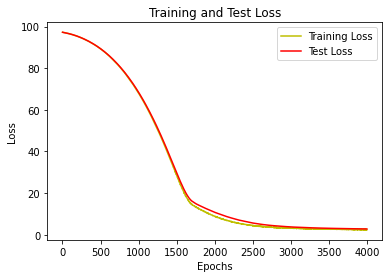

In [17]:
loss = history.history['loss']
val_loss = history.history ['val_loss']
epochs = range (1, len(loss)+1)
plt.plot(epochs, loss, 'y', Label='Training Loss')
plt.plot(epochs, val_loss, 'r', Label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Training and Test Loss.jpg')
plt.show()

C:\Users\Windows10\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


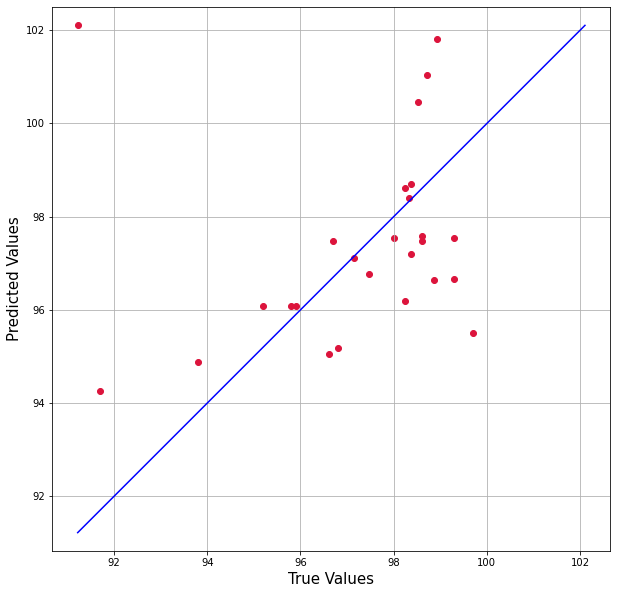

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_predicted, c='crimson')
p1 = max(max(Y_predicted), max(Y_test))
p2 = min(min(Y_predicted), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.grid()
plt.savefig('True Values vs Predicted Values.jpg')
plt.show()

# 5-Fold Cross Validation

In [21]:
df = pd.read_csv('D:\\Drive 1\\MS\\Masters\\Additive Manufacturing\\AI in AM\\1\\Data 3.csv', header =0)
X = df.iloc[:,1:5]
X = pd.DataFrame(X)
Y = df.iloc[:,5]
Y = pd.DataFrame (Y)
X = X.values
Y = Y.values

In [22]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))
    
kf=KFold(5, shuffle = True, random_state=50)
OOS_y = []
OOS_prediction = []
score_list = []
fold = 0
for train, test in kf.split(X):
    fold = fold+1
    opt = SGD(learning_rate = 0.01, clipnorm=1.0)
    X_train = X[train]
    Y_train = Y[train]
    X_test = X[test]
    Y_test = Y[test]
    model = Sequential ()
    model.add(InputLayer(X_train.shape[1]))
    model.add(Dense(96,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(32,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(32,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(32,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(32,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(32,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(32,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(32,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(32,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(1))
    model.compile(loss = 'mean_squared_error', optimizer = opt)
    model.fit(X_train, Y_train, epochs=5000, verbose = 0, batch_size = 32, validation_data = (X_test, Y_test))
    prediction = model.predict(X_test)
    OOS_y.append(Y_test)
    OOS_prediction.append(prediction)
    score = np.sqrt(metrics.mean_squared_error(prediction, Y_test))
    score_list.append(score)
    print (f"Final score (RMSE): {score}")
mean = statistics.mean(score_list)
print("Mean of 5-fold cross validation is equal to {}".format(mean))
OOS_y = np.concatenate (OOS_y)    
OOS_prediction = np.concatenate (OOS_prediction)
OOS_y = pd.DataFrame(OOS_y)
OOS_prediction = pd.DataFrame (OOS_prediction)
OOS = pd.concat ([df, OOS_y, OOS_prediction], axis = 1)

Final score (RMSE): 1.9530884516009528
Final score (RMSE): 3.8733147400830914
Final score (RMSE): 4.863557294077026
Final score (RMSE): 2.8878311424092487
Final score (RMSE): 2.937116772709015
Mean of 5-fold cross validation is equal to 3.3029816801758667


In [23]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))
    
kf=KFold(5, shuffle = True, random_state=50)
OOS_y = []
OOS_prediction = []
score_list = []
fold = 0
for train, test in kf.split(X):
    fold = fold+1
    opt = SGD(learning_rate = 0.01, clipnorm=1.0)
    X_train = X[train]
    Y_train = Y[train]
    X_test = X[test]
    Y_test = Y[test]
    model = Sequential ()
    model.add(InputLayer(X_train.shape[1]))
    model.add(Dense(32,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(32,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(32,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(32,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(32,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(32,activation='relu', bias_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(1))
    model.compile(loss = 'mean_absolute_error', optimizer = opt)
    model.fit(X_train, Y_train, epochs=4000, verbose = 0, batch_size = 32, validation_data = (X_test, Y_test))
    prediction = model.predict(X_test)
    OOS_y.append(Y_test)
    OOS_prediction.append(prediction)
    score = metrics.mean_absolute_error(prediction, Y_test)
    score_list.append(score)
    print (f"Final score (MAE): {score}")
mean = statistics.mean(score_list)
print("Mean of 5-fold cross validation is equal to {}".format(mean))
OOS_y = np.concatenate (OOS_y)    
OOS_prediction = np.concatenate (OOS_prediction)
OOS_y = pd.DataFrame(OOS_y)
OOS_prediction = pd.DataFrame (OOS_prediction)
OOS = pd.concat ([df, OOS_y, OOS_prediction], axis = 1)

Final score (MAE): 22.266351426068475
Final score (MAE): 2.7540552475873152
Final score (MAE): 2.9282949290556077
Final score (MAE): 1.2574059879078598
Final score (MAE): 18.943059158325195
Mean of 5-fold cross validation is equal to 9.62983334978889
